## Perform Exploratory Data Analysis on the data set

### I- Assessing
In this stage we display the data we're going to import to assess its Quality and Tidiness.

Quality dimensions or aspects are mainly:

**1**- Completness (checking if there are any missing records).

**2**- Validity (Checking if the values displayed are 'valid' i.e data that follow certain known rules)

**3**- Accuracy (a significant decrease or increase in a value is considered an 'inaccurate data')

**4**- Consistency (There should be only one way to represent or refer to a value otherwise the data is called to be 'inconsistent')

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
stroke_data =pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_data.shape

(5110, 12)

In [182]:
stroke_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [183]:
stroke_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [184]:
stroke_data.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [185]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [186]:
# Gender column
stroke_data.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [187]:
# Age column
stroke_data.age.value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
0.48       3
1.40       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64

* Note: some values in the 'Age' column doesn't make any sense.

In [188]:
# Hypertension column
stroke_data.hypertension.value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [189]:
# Heart disease column
stroke_data.heart_disease.value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [190]:
# Ever-married column
stroke_data.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [191]:
# Work type column
stroke_data.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

* Note: 687 records in this column are assigned under 'children' category which is not a suitable work type.

In [192]:
# Residence type column
stroke_data.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [193]:
# Average glucose level column
stroke_data.avg_glucose_level.describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [194]:
# BMI column
stroke_data.bmi.isnull().sum()

201

In [195]:
# Smoking status column
stroke_data.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [196]:
# Stroke column
stroke_data.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

### II-Cleaning
- Drop ID column since it's not necessary in our analysis.
- Change the format of 'hyper tension', 'heart disease', 'stroke', 'Gender' to category.
- Fill the 201 null values in 'BMI' column.
- Drop the 'other' category in the gender column.
- Add values under children category to those of never worked category.
- Create 'age category' column.

In [197]:
# Drop ID column.

stroke_data= stroke_data.drop(columns= 'id')
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [198]:
# Change the format of 'hyper tension', 'heart disease', 'stroke' to category.

stroke_data['hypertension'] = stroke_data['hypertension'].astype('category')
stroke_data['heart_disease'] = stroke_data['heart_disease'].astype('category')
stroke_data['stroke'] = stroke_data['stroke'].astype('category')
stroke_data['gender'] = stroke_data['gender'].astype('category')
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   float64 
 2   hypertension       5110 non-null   category
 3   heart_disease      5110 non-null   category
 4   ever_married       5110 non-null   object  
 5   work_type          5110 non-null   object  
 6   Residence_type     5110 non-null   object  
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                4909 non-null   float64 
 9   smoking_status     5110 non-null   object  
 10  stroke             5110 non-null   category
dtypes: category(4), float64(3), object(4)
memory usage: 300.0+ KB


In [199]:
# Fill the 201 null values in 'BMI' column.
# Let's ignore the 'other' column since it will be removed. 
# We will fill each missing value in 'bmi' column with the mean value for each gender
stroke_data.groupby('gender')['bmi'].mean()

gender
Female    29.065758
Male      28.647936
Other     22.400000
Name: bmi, dtype: float64

In [200]:
# Mean bmi for male = 28.6 // mean bmi for female = 29, So pretty much the same value
stroke_data = stroke_data.fillna(stroke_data.mean())

# Now let's check that all null values are replaced with the mean values.
stroke_data.bmi.isnull().sum()

0

In [201]:
# Drop the 'other' category in the gender column.
other = stroke_data[stroke_data['gender'] == 'Other'].index
stroke_data.drop(other, axis=0, inplace= True)
stroke_data.gender.value_counts()

Female    2994
Male      2115
Other        0
Name: gender, dtype: int64

In [202]:
# Add values under children category to those of never worked category.
stroke_data.work_type = np.where(stroke_data['work_type'] == 'children','Never_worked',stroke_data.work_type)
stroke_data.work_type.value_counts()

Private          2924
Self-employed     819
Never_worked      709
Govt_job          657
Name: work_type, dtype: int64

In [203]:
# Create 'age category' column.
conditions= [(stroke_data['age'] <=14), 
                 (stroke_data['age'] >=15) & (stroke_data['age']<=24),
                 (stroke_data['age'] >=25) & (stroke_data['age']<=64),
                 (stroke_data['age'] >= 65)
]

values= ['Child','Youth','Adult','Senior']

#Create the new column
stroke_data['Age_Category']= np.select(conditions,values)

#Now we check if the new column is added
stroke_data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Category
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Senior
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Adult
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Senior
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Adult
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Senior


**Further Exploration**
- Some values in the BMI column made no sense.
A mean BMI value of 12 as the lower limit for human survival and the maximum possible BMI is 50 which falls under the 'extremely obese' category.
Hence BMI values less than 12 or more than 50 are considered outliers and should be dealt with.

In [204]:
stroke_data.loc[stroke_data['bmi'] < 12 ]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Category
1609,Female,1.24,0,0,No,Never_worked,Rural,122.04,10.3,Unknown,0,Child
2187,Male,40.00,0,0,Yes,Private,Rural,60.96,11.5,never smoked,0,Adult
3307,Female,79.00,0,0,Yes,Self-employed,Urban,79.03,11.3,Unknown,0,Senior


Record 1609 is a baby so a BMI of 10.3 is acceptable, but the other 2 records are for a 40 year-old male and a 79 year-old female having very low BMI levels. Anyhow, they didn't have a stroke so we can safely remove them.


In [205]:
stroke_data = stroke_data.drop(labels=[1609,2187,3307], axis=0)


In [206]:
#Now let's make sure the records are deleted
stroke_data.loc[stroke_data['bmi'] < 12 ]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Category


In [207]:
#Investigate records with BMI more than 50
stroke_data.loc[stroke_data['bmi'] > 50 ]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Category
113,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1,Adult
254,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0,Adult
258,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0,Senior
270,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0,Adult
333,Female,52.0,0,0,Yes,Private,Urban,82.24,54.7,formerly smoked,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
4650,Male,54.0,0,0,Yes,Private,Rural,100.47,50.2,formerly smoked,0,Adult
4779,Female,58.0,0,0,Yes,Self-employed,Urban,66.71,51.7,never smoked,0,Adult
4838,Female,51.0,0,0,Yes,Private,Urban,107.72,60.9,Unknown,0,Adult
4906,Female,53.0,0,0,Yes,Private,Urban,70.51,54.1,never smoked,0,Adult


In [208]:
stroke_data.drop(stroke_data.index[stroke_data['bmi'] > 50], inplace = True)

In [209]:
#Now let's make sure the records are deleted
stroke_data.loc[stroke_data['bmi'] > 50 ]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Category


### Features Selection

In [210]:
#Rearrange the columns
stroke_data = stroke_data[["gender", "age", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "avg_glucose_level", "bmi", "smoking_status", "Age_Category", "stroke"]]

#Assign numeric values to the binary and categorical columns
from sklearn.preprocessing import LabelEncoder

stroke_data2= stroke_data.copy()

number= LabelEncoder()
stroke_data2['gender']= number.fit_transform(stroke_data2['gender'])
stroke_data2['ever_married']= number.fit_transform(stroke_data2['ever_married'])
stroke_data2['work_type']= number.fit_transform(stroke_data2['work_type'])
stroke_data2['Residence_type']= number.fit_transform(stroke_data2['Residence_type'])
stroke_data2['smoking_status']= number.fit_transform(stroke_data2['smoking_status'])
stroke_data2['Age_Category']= number.fit_transform(stroke_data2['Age_Category'])
stroke_data2.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Age_Category,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,2,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,0,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,0,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,2,1


In [211]:
#Using the SelectKBest library to run a chi-squared statistical test & select the top 3 features that are most related to the output

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X= stroke_data2.iloc[:,0:11] #all features 
Y= stroke_data2.iloc[:,-1] #target (stroke)

best_features= SelectKBest(score_func=chi2, k=3) #function that select the top 3 features.
fit= best_features.fit(X,Y) 

#Creating dataframes for the features and the score of each feature.
stroke_scores= pd.DataFrame(fit.scores_)
stroke_columns= pd.DataFrame(X.columns)

In [70]:
#Create a dataframe that combines all the features and their corresponding scores.
features_scores= pd.concat([stroke_columns, stroke_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
0,gender,0.224495
6,Residence_type,0.638709
9,smoking_status,3.297721
5,work_type,7.492964
4,ever_married,20.957745
8,bmi,24.560126
10,Age_Category,55.667667
2,hypertension,79.206269
3,heart_disease,86.667013
7,avg_glucose_level,1700.795167


### III- Build a simple logistic model to predict strokes using the most 2 related features.


#### Since the dataset is unbalanced, we need to use a technique to balance the (stroke, no stroke) target.
#### The most suitable technique would be "Resampling technique".

class 0: (4779, 12)
class 1: (248, 12)
total class of 1 and 0: 0    248
1    248
Name: stroke, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

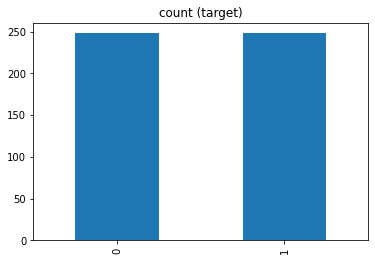

In [212]:
# class count
class_count_0, class_count_1 = stroke_data['stroke'].value_counts()

# Separate class
class_0 = stroke_data2[stroke_data['stroke'] == 0]
class_1 = stroke_data2[stroke_data['stroke'] == 1]# print the shape of the class

print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

# In under-sampling, the simplest technique involves removing random records from the majority class.
# Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:",test_under['stroke'].value_counts())

# plot the count after under-sampeling
test_under['stroke'].value_counts().plot(kind='bar', title='count (target)')

Split the dataset into X and Y:

In [219]:
X= test_under[['age', 'avg_glucose_level']]
y= test_under['stroke']

In [220]:
X.shape

(496, 2)

In [218]:
y.shape

(496,)

Split the dataset into train and test:

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=100) 

Create a logistic regression body:

In [222]:
logreg= LogisticRegression()
logreg.fit(X_train,y_train) 

LogisticRegression()

In [223]:
y_pred=logreg.predict(X_test)
print (X_test) #test dataset
print (y_pred) #predicted values

        age  avg_glucose_level
1336  44.00              78.18
179   81.00             213.22
960   24.00              59.28
9     78.00              58.57
31    42.00              83.41
...     ...                ...
1145   7.00              88.60
96    70.00              76.34
2397   1.64             115.12
34    48.00              84.20
6     74.00              70.09

[199 rows x 2 columns]
[0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0
 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0
 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1
 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0
 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0
 1 1 1 0 1 1 1 0 1 0 1 0 0 1]


### Model Evaluation using Confusion Matrix
#### A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

Confusion matrix : 
 [[83 16]
 [28 72]]


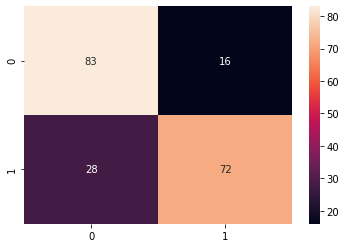

In [224]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)

#Let's visualize the matrix
import seaborn as sns
sns.heatmap(matrix, annot=True)
plt.show()

### Let's evaluate the model we've just built using model evaluation metrics such as accuracy, recall and precision.

In [225]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('Recall: ',metrics.recall_score(y_test, y_pred, zero_division=1))
print("Precision:",metrics.precision_score(y_test, y_pred, zero_division=1))
print("CL Report:",metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy:  0.7788944723618091
Recall:  0.8383838383838383
Precision: 0.7477477477477478
CL Report:               precision    recall  f1-score   support

           0       0.82      0.72      0.77       100
           1       0.75      0.84      0.79        99

    accuracy                           0.78       199
   macro avg       0.78      0.78      0.78       199
weighted avg       0.78      0.78      0.78       199



### ROC Curve
### the receiver operating characteristic curve is used to display the sensitivity & specificity of the logistic regression model by calcuating the true positive rate & the false positive rate.

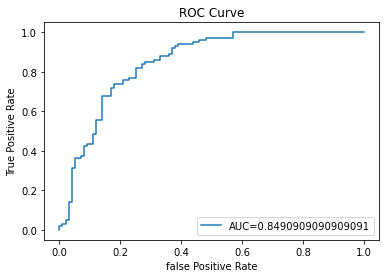

In [226]:
#define metrics
y_pred_proba= logreg.predict_proba(X_test) [::,1]

#Calculate true positive and false positive rates
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pred_proba)

#Calculate the area under curve to see the model performance
auc= metrics.roc_auc_score(y_test, y_pred_proba)

#Create ROC curve
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('false Positive Rate')
plt.legend(loc=4)

### The area under curve (AUC) is 0.84 which is very close to one meaning that the model did a great job.

Now if we have other patients with different ages or glucose levels the model can predict if they may have a stroke or not.

In [227]:
#This dataset is fictional and for illustrating only.
new_patients= {'age': [20, 35, 70, 80, 90, 100], 'avg_glucose_level': [120, 140, 160, 200, 170, 150]}
stroke_new= pd.DataFrame(new_patients, columns= ['age','avg_glucose_level'])
stroke_new

,age,avg_glucose_level
0,20,120
1,35,140
2,70,160
3,80,200
4,90,170
5,100,150


Now let's try the model on the new dataset:

In [228]:
X= stroke_data[['age', 'avg_glucose_level']]
y= stroke_data['stroke']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0) 

logreg= LogisticRegression()
logreg.fit(X, y.values.ravel())


new_patients= {'age': [20, 35, 70, 80, 90, 100], 'avg_glucose_level': [120, 140, 160, 200, 170, 150]}
stroke_new= pd.DataFrame(new_patients, columns= ['age', 'avg_glucose_level'])

y_pred=logreg.predict(stroke_new)

print (stroke_new)
print (y_pred)

   age  avg_glucose_level
0   20                120
1   35                140
2   70                160
3   80                200
4   90                170
5  100                150
[0 0 0 0 0 1]


### Save the model to be used later

In [229]:
import joblib
joblib.dump(logreg, 'LogisticRegression.pkl')


['LogisticRegression.pkl']

### IV- Analysis and visualization 
#### We'll now look at the relationships between the stroke and different variables.

In [230]:
stroke_data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Age_Category,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,Senior,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,Adult,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,Senior,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,Adult,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Senior,1


#### 1- The relation between 'Age' and 'Stroke'
#### I- According to age range

<AxesSubplot:xlabel='age', ylabel='value'>

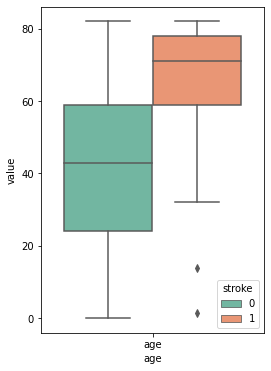

In [231]:
fig,ax = plt.subplots(figsize = (4,6))
#Create dataset that shows each age value and its corresponding stroke state
age_data= pd.concat([stroke_data['age'], y], axis=1)

#Create dataset for the plot
age_plot= pd.melt(age_data, id_vars= 'stroke', var_name= 'age')

#Create the plot
sns.boxplot(x= 'age', y= 'value', hue= 'stroke', data= age_plot, palette="Set2")

#### II- According to age category

<AxesSubplot:xlabel='Age_Category', ylabel='0'>

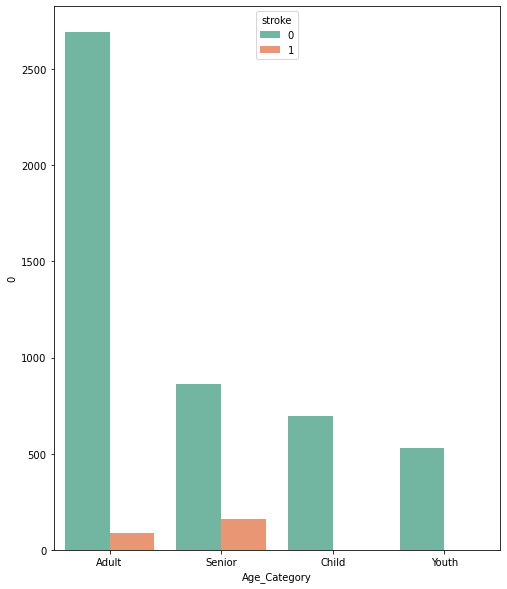

In [232]:
fig,ax = plt.subplots(figsize = (8,10))
#Create dataset that shows smoking state and its corresponding stroke state
agecat_data= pd.concat([stroke_data['Age_Category'], y], axis=1)

#Create dataset for the plot
agecat_plot= stroke_data[['Age_Category', 'stroke']].value_counts().reset_index()

#Create the plot
sns.barplot(x= 'Age_Category', y= 0, hue= 'stroke', data= agecat_plot, palette="Set2")

#### It's clear from the plot that older patients 'seniors' (60-80 years) are more likely to have a stroke than younger people, so age is a crucial factor in predicting strokes.

#### 2-The relation between 'Glucose level' and 'Stroke'

<AxesSubplot:xlabel='avg_glucose_level', ylabel='value'>

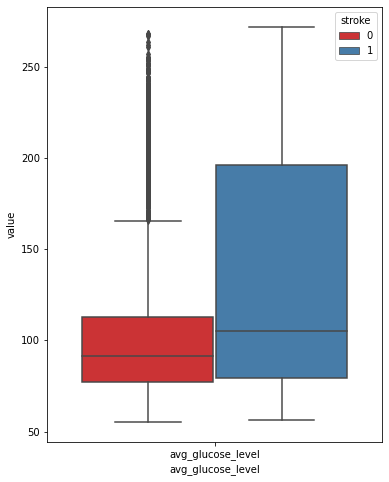

In [233]:
fig,ax = plt.subplots(figsize = (6,8))
#Create dataset that shows each glucose level value and its corresponding stroke state
glucose_data= pd.concat([stroke_data['avg_glucose_level'], y], axis=1)

#Create dataset for the plot
glucose_plot= pd.melt(glucose_data, id_vars= 'stroke', var_name= 'avg_glucose_level')

#Create the plot
sns.boxplot(x= 'avg_glucose_level', y= 'value', hue= 'stroke', data= glucose_plot, palette="Set1")

#### From the visual we can notice that higher glucose levels are associated with a higher risk of a stroke, also there're too many outliers.
#### Glucose levels ranging between 80-120 are not a precise indicator to predict a stroke since some patients with this glucose level had a stroke and others didn't.

#### 3-The relation between 'BMI' and 'Stroke'

<AxesSubplot:xlabel='bmi', ylabel='value'>

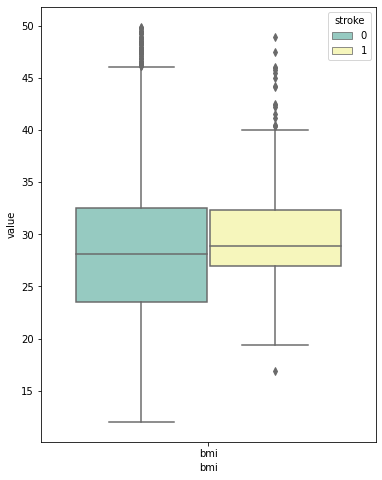

In [234]:
fig,ax = plt.subplots(figsize = (6,8))
#Create dataset that shows each bmi value and its corresponding stroke state
bmi_data= pd.concat([stroke_data['bmi'], y], axis=1)

#Create dataset for the plot
bmi_plot= pd.melt(bmi_data, id_vars= 'stroke', var_name= 'bmi')

#Create the plot
sns.boxplot(x= 'bmi', y= 'value', hue= 'stroke', data= bmi_plot, palette="Set3")

#### We notice here that  some patients with bmi ranging from (28-33) already had a stroke while others with the same bmi didn't, so bmi isn't necessarily correlated to a stroke.

#### 4-The relation between 'Gender' and 'Stroke'

<AxesSubplot:xlabel='gender', ylabel='0'>

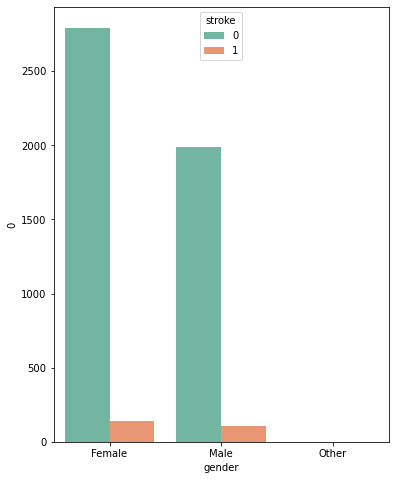

In [235]:
fig,ax = plt.subplots(figsize = (6,8))
#Create dataset that shows each gender and its corresponding stroke state
gender_data= pd.concat([stroke_data['gender'], y], axis=1)

#Create dataset for the plot
gender_plot= stroke_data[['gender', 'stroke']].value_counts().reset_index()

#Create the plot
sns.barplot(x= 'gender', y= 0, hue= 'stroke', data= gender_plot, palette="Set2")

In [236]:
gender_plot= stroke_data[['gender', 'stroke']].value_counts().reset_index()
gender_plot.head(5)

,gender,stroke,0
0,Female,0,2793
1,Male,0,1986
2,Female,1,140
3,Male,1,108


#### From the previous plot & table, it's clear that  females (140) were more likely to have a stroke than males (108).

#### 5-The relation between 'Hypertension' and 'Stroke'

<AxesSubplot:xlabel='hypertension', ylabel='0'>

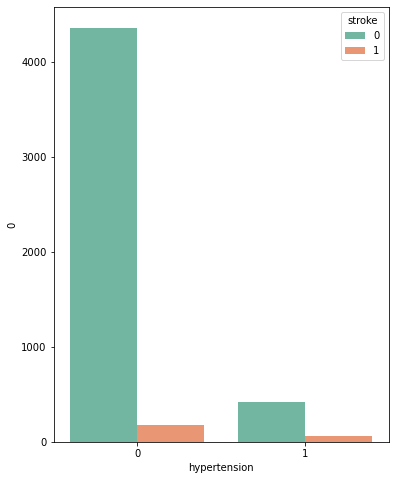

In [237]:
fig,ax = plt.subplots(figsize = (6,8))
#Create dataset that shows hypertension state and its corresponding stroke state
hypertn_data= pd.concat([stroke_data['hypertension'], y], axis=1)

#Create dataset for the plot
hypertn_plot= stroke_data[['hypertension', 'stroke']].value_counts().reset_index()

#Create the plot
sns.barplot(x= 'hypertension', y= 0, hue= 'stroke', data= hypertn_plot, palette="Set2")

In [238]:
hypertn_plot= stroke_data[['hypertension', 'stroke']].value_counts().reset_index()
hypertn_plot.head(5)

,hypertension,stroke,0
0,0,0,4364
1,1,0,415
2,0,1,182
3,1,1,66


#### From the previous table we notice that:
#### 4364 patients are neither hypertensive nor had a stroke and that shows a significant relationship and that's also backed up by the hypertension score in the feature selection where it was the fourth most related feature to strokes.
#### 415 patients are hypertensive but didn't have a stroke which means that hypertension isn't necessarily associated with strokes.
#### 182 patients had a stroke but aren't hypertensive and that signifies that stroke isn't necesarily associated with hypertension.
#### 66 patients both had a stroke and are hypertensive so there is a slight positive correlation.

#### 6-The relation between 'Heart disease' and 'Stroke'

<AxesSubplot:xlabel='heart_disease', ylabel='0'>

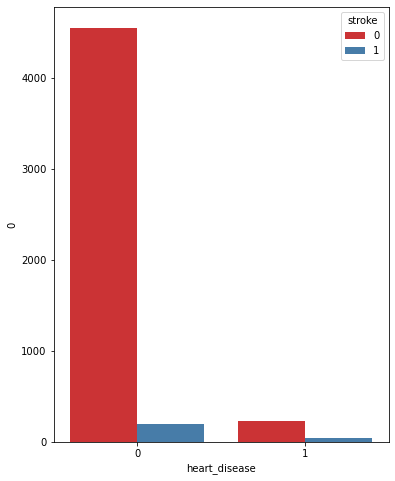

In [239]:
fig,ax = plt.subplots(figsize = (6,8))
#Create dataset that shows heart disease state and its corresponding stroke state
heart_data= pd.concat([stroke_data['heart_disease'], y], axis=1)

#Create dataset for the plot
heart_plot= stroke_data[['heart_disease', 'stroke']].value_counts().reset_index()

#Create the plot
sns.barplot(x= 'heart_disease', y= 0, hue= 'stroke', data= heart_plot, palette="Set1")

In [240]:
heart_plot= stroke_data[['heart_disease', 'stroke']].value_counts().reset_index()
heart_plot.head()

,heart_disease,stroke,0
0,0,0,4551
1,1,0,228
2,0,1,201
3,1,1,47


#### From the previous we notice that:
#### 228 patients have heart disease but didn't have a stroke which implies that heart disease isn't significantly associated with strokes.
#### 201 patients had a stroke but don't suffer from heart disease and that signifies that strokes aren't necesarily associated with heart disease.
#### 47 patients both had a stroke and suffer from heart disease and 4551 neither had heart disease

#### 7-The relation between 'Marital status' and 'Stroke'

<AxesSubplot:xlabel='ever_married', ylabel='0'>

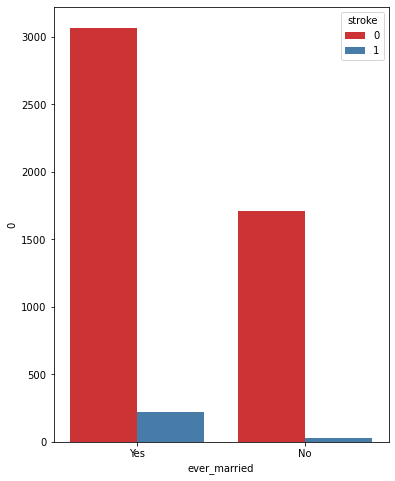

In [241]:
fig,ax = plt.subplots(figsize = (6,8))
#Create dataset that shows marital status and its corresponding stroke state
social_data= pd.concat([stroke_data['ever_married'], y], axis=1)

#Create dataset for the plot
social_plot= stroke_data[['ever_married', 'stroke']].value_counts().reset_index()

#Create the plot
sns.barplot(x= 'ever_married', y= 0, hue= 'stroke', data= social_plot, palette="Set1")

In [242]:
social_plot= stroke_data[['ever_married', 'stroke']].value_counts().reset_index()
social_plot.head()

,ever_married,stroke,0
0,Yes,0,3068
1,No,0,1711
2,Yes,1,219
3,No,1,29


#### The data shows that marriage is not strongly correlated to strokes.

#### 8-The relation between 'Work type' and 'Stroke'

<AxesSubplot:xlabel='work_type', ylabel='0'>

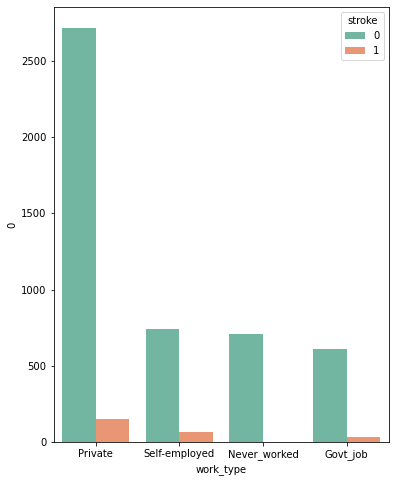

In [243]:
fig,ax = plt.subplots(figsize = (6,8))
#Create dataset that shows work type and its corresponding stroke state
work_data= pd.concat([stroke_data['work_type'], y], axis=1)

#Create dataset for the plot
work_plot= stroke_data[['work_type', 'stroke']].value_counts().reset_index()

#Create the plot
sns.barplot(x= 'work_type', y= 0, hue= 'stroke', data= work_plot, palette="Set2")

In [244]:
work_plot= stroke_data[['work_type', 'stroke']].value_counts().reset_index()
work_plot.head(10)

,work_type,stroke,0
0,Private,0,2717
1,Self-employed,0,743
2,Never_worked,0,706
3,Govt_job,0,613
4,Private,1,148
5,Self-employed,1,65
6,Govt_job,1,33
7,Never_worked,1,2


#### It's clear that the largest proportion of those who had a stroke are in the private sector (148), although it's not that big of a number but it's worth taken into consideration.

#### 9-The relation between 'Residence type' and 'Stroke'

<AxesSubplot:xlabel='Residence_type', ylabel='0'>

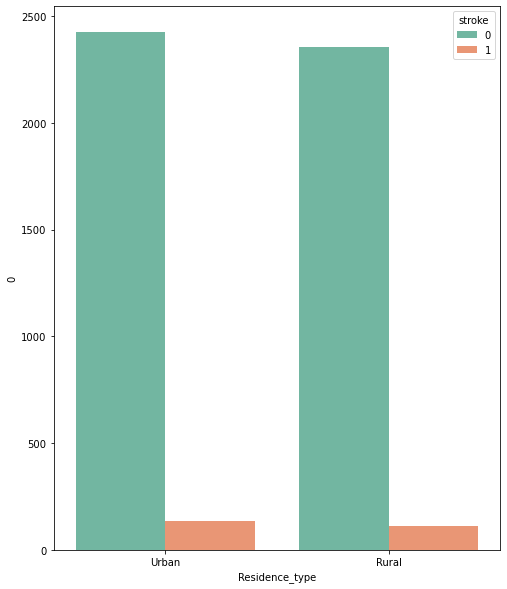

In [245]:
fig,ax = plt.subplots(figsize = (8,10))
#Create dataset that shows work type and its corresponding stroke state
residence_data= pd.concat([stroke_data['Residence_type'], y], axis=1)

#Create dataset for the plot
residence_plot= stroke_data[['Residence_type', 'stroke']].value_counts().reset_index()

#Create the plot
sns.barplot(x= 'Residence_type', y= 0, hue= 'stroke', data= residence_plot, palette="Set2")

#### It seems that residence type doesn't have a great effect on predicting strokes.

#### 10-The relation between 'Smoking status' and 'Stroke'

<AxesSubplot:xlabel='smoking_status', ylabel='0'>

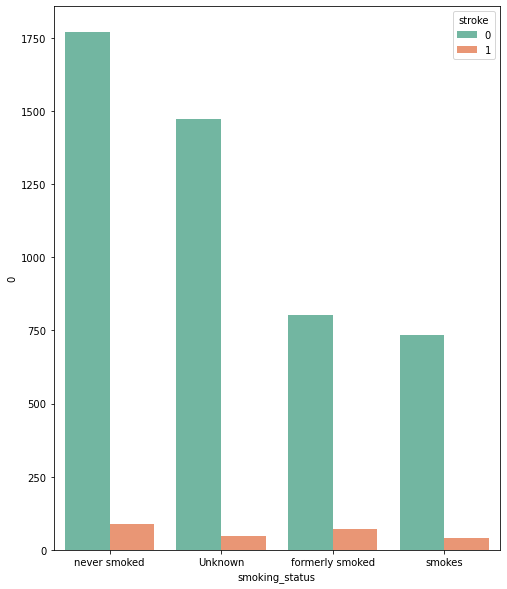

In [246]:
fig,ax = plt.subplots(figsize = (8,10))
#Create dataset that shows smoking state and its corresponding stroke state
smoking_data= pd.concat([stroke_data['smoking_status'], y], axis=1)

#Create dataset for the plot
smoking_plot= stroke_data[['smoking_status', 'stroke']].value_counts().reset_index()

#Create the plot
sns.barplot(x= 'smoking_status', y= 0, hue= 'stroke', data= smoking_plot, palette="Set2")

In [247]:
smoking_plot= stroke_data[['smoking_status', 'stroke']].value_counts().reset_index()
smoking_plot.head(10)

,smoking_status,stroke,0
0,never smoked,0,1769
1,Unknown,0,1474
2,formerly smoked,0,801
3,smokes,0,735
4,never smoked,1,89
5,formerly smoked,1,70
6,Unknown,1,47
7,smokes,1,42


#### The result here is quite interesting, it was expected that smokers have a higher risk of a stroke but the data shows that 735 smoker patients never experienced a stroke while 89 non-smoker already had a stroke, so unlike the usual, smoking status is not a good predictor of a stroke for these records.

## Final conclusions

### This dataset has 5110 records and 12 columns representing 12 different clinical and demographic features.
#### From the analysis, the following points were concluded:
#### 1- Seniors have a higher risk of stroke compared to adults and youth, so it's a good indicator.
#### 2- The level of average glucose isn't correlated.
#### 3- BMI isn't highly related to a stroke and for this dataset can never be considered a risk factor for strokes.
#### 4- Gender data showed that both males and females have strokes but more females suffered from strokes than males.
#### 5- Hypertension is definitely not correlated to strokes for this data since many hypertensive patients didn't have a stroke and others who aren't did suffer from a stroke, the same conclusion applies for heart disease which surprisingly was not a propable risk factor.
#### 6- Marital status, residence type and smoking status are all weakly related to strokes for this dataset.
#### 7- On the other hand, people working in the private sector showed higher level of stroke than people with other work types.

In [248]:
stroke_data.to_csv(r'C:\Users\sss-a\Desktop\Practicum Internship\Project\healthcare-dataset-stroke-data.csv')

In [249]:
stroke_data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Age_Category,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,Senior,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,Adult,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,Senior,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,Adult,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Senior,1
